In [1]:
import torch 

In [2]:
x = torch.arange(0, 10, 0.1, dtype=torch.float32).reshape(100, 1)
y = 4 + 3 * x + torch.randn((len(x), 1))
print(y)
len(x)

tensor([[ 3.2034],
        [ 5.0824],
        [ 5.6882],
        [ 6.0911],
        [ 6.2225],
        [ 5.3259],
        [ 4.6035],
        [ 5.6154],
        [ 4.3905],
        [ 8.7180],
        [ 6.6286],
        [ 6.8778],
        [ 7.3043],
        [ 7.3066],
        [ 9.5912],
        [ 7.6870],
        [10.0093],
        [ 8.0951],
        [11.6060],
        [ 9.4325],
        [ 9.9101],
        [10.8038],
        [12.5243],
        [10.1388],
        [13.0167],
        [10.6096],
        [11.3237],
        [12.3984],
        [11.2342],
        [12.7590],
        [13.7025],
        [12.8093],
        [15.6424],
        [13.5813],
        [14.4252],
        [15.8822],
        [13.1601],
        [14.1095],
        [14.9522],
        [14.6633],
        [14.3033],
        [17.9240],
        [16.1952],
        [17.0416],
        [17.2722],
        [17.5189],
        [18.0706],
        [19.0337],
        [19.3405],
        [18.2135],
        [18.1671],
        [19.2433],
        [20.

100

In [3]:
w = torch.tensor([1.], requires_grad=True)
print(w)

tensor([1.], requires_grad=True)


In [99]:

w = w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

y_hat = w*x + b

loss = torch.sum((y_hat - y)**2)
print(loss)

tensor(83616.6875, grad_fn=<SumBackward0>)


In [100]:
learning_rate = 0.01

w = w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

print(w.item(), b.item())

for i in range(10):
  
  x = torch.randn([20, 1])
  y = 3*x + 4
  
  y_hat = w*x + b
  loss = torch.sum((y_hat - y)**2)
  
  loss.backward()
  
  with torch.no_grad():
    w -= learning_rate * w.grad
    b -= learning_rate * b.grad
    
    w.grad.zero_()
    b.grad.zero_()

  print(w.item(), b.item())

0.4571561813354492 2.4379804134368896
1.9775699377059937 2.9639110565185547
2.6890554428100586 3.5630476474761963
2.793668270111084 3.681411027908325
2.8548152446746826 3.7856063842773438
2.938429117202759 3.8665833473205566
2.96856689453125 3.9211413860321045
2.973220109939575 3.949859380722046
2.9813458919525146 3.967303991317749
2.987419366836548 3.980546712875366
2.9912445545196533 3.987318515777588


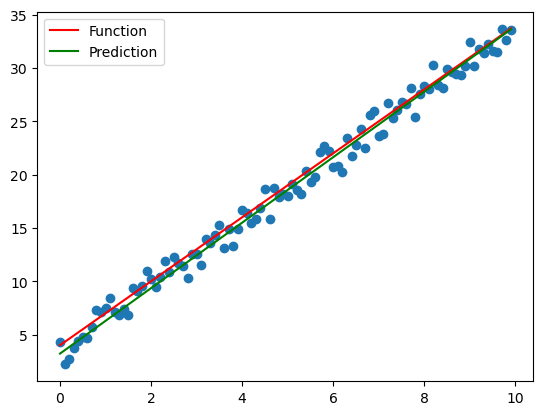

In [4]:
import matplotlib.pyplot as plt
class Net(torch.nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(1, 2)
        self.output = torch.nn.Linear(2, 1)
    
    def forward(self, x):
        x = torch.relu(self.hidden1(x))
        #x = torch.relu(self.hidden2(x))
        x = self.output(x)
        return x
x = torch.arange(0, 10, 0.1, dtype=torch.float32).reshape(100, 1)
y = 4 + 3 * x + torch.randn((len(x), 1))
net = Net()
loss_fun = torch.nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)

for epoch in range(1000):
    optimizer.zero_grad()
    output = net(x)
    loss = loss_fun(output, y)
    loss.backward()
    optimizer.step()
f = 4 + 3 * x
y_hat = net(x).detach().numpy()
plt.scatter(x, y)
plt.plot(x, f, 'r', label='Function')
plt.plot(x, y_hat, 'g', label='Prediction')
plt.legend()
plt.show()


tensor([[-0.5404,  0.7531]], requires_grad=True)
tensor([[-0.4403],
        [-0.1415]], requires_grad=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


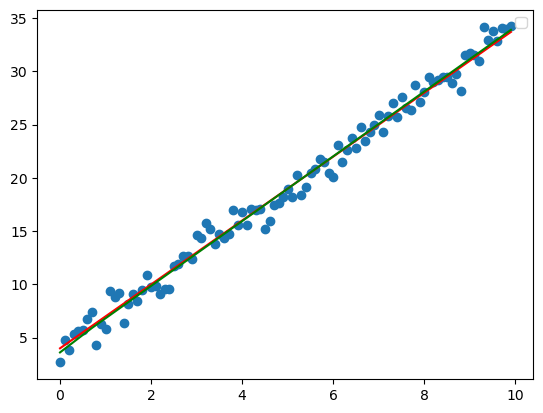

In [133]:
x = torch.arange(0, 10, 0.1, dtype=torch.float32).reshape(100, 1)
y = 4 + 3 * x + torch.randn((len(x), 1))
w1 = torch.randn(1, 2, requires_grad=True)
w2 = torch.randn(2, 1, requires_grad=True)
b1 = torch.randn(1, 2, requires_grad=True)
b2 = torch.randn(1, 1, requires_grad=True)
print(w1)
print(w2)
learning_rate = 0.001
epochs = 1000
loss_fun = torch.nn.MSELoss()
for epoch in range(epochs):
    a1 = torch.matmul(x, w1) + b1
    h1 = torch.relu(a1)
    y_hat = torch.matmul(h1, w2) + b2
    loss = loss_fun(y_hat, y)
    loss.backward()   
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        b1 -= learning_rate * b1.grad
        b2 -= learning_rate * b2.grad
        w1.grad.zero_()
        w2.grad.zero_()
        b1.grad.zero_()
        b2.grad.zero_()
f = 4 + 3 * x
a1=torch.matmul(x, w1) + b1
h1=torch.relu(a1)
a2=torch.matmul(h1,w2)+b2
h_hat=torch.relu(a2)
y_hat = y_hat.detach().numpy()
plt.scatter(x, y)
plt.plot(x, f, 'r')
plt.plot(x, y_hat, 'g')
plt.legend()
plt.show()
